# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fadhil Rahman


## Landasan Teori

### 1. Pengertian Analisis Data
Analisis data adalah proses inspeksi, pembersihan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna, menarik kesimpulan, dan mendukung pengambilan keputusan.

### 2. Perbedaan Descriptive Analysis dan Exploratory Data Analysis (EDA)
- **Descriptive Analysis:** Menjawab "Apa yang terjadi?" dengan merangkum data masa lalu (mean, median, modus).
- **EDA (Exploratory Data Analysis):** Menjawab "Mengapa ini terjadi?" dengan mencari pola, anomali, atau hubungan antar variabel menggunakan visualisasi dan statistik.

### 3. Pentingnya Data Cleaning dan Wrangling
Data mentah seringkali kotor (missing value, duplikat, format salah). Cleaning dan wrangling memastikan data akurat dan siap dianalisis agar tidak menghasilkan kesimpulan yang bias (*Garbage In, Garbage Out*).

### 4. Peran Visualisasi Data
Visualisasi mengubah angka rumit menjadi grafik yang mudah dipahami otak manusia, membantu stakeholders melihat tren dan outlier dengan cepat.

### 5. Machine Learning (Opsional)
Dalam proyek ini, digunakan **Linear Regression** untuk memprediksi jumlah penyewaan sepeda berdasarkan variabel cuaca. Teknik ini dipilih karena target variabel bersifat kontinu (numerik) dan kita ingin melihat pengaruh linear dari fitur-fitur yang ada.

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh musim (season) terhadap rata-rata jumlah penyewaan sepeda harian?
- Pertanyaan 2 : Bagaimana tren performa penyewaan sepeda mengalami perubahan dari tahun 2011 ke tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set style seaborn
sns.set(style='darkgrid')

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset
day_df = pd.read_csv("day.csv")

# Menampilkan 5 baris pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berhasil dimuat dengan baik ke dalam dataframe.
- Dataset terdiri dari 731 baris (entri harian) dan 16 kolom yang memuat informasi tanggal, cuaca, dan jumlah penyewaan.

### Assessing Data

In [3]:
print("Info Data:")
day_df.info()

print("\nMissing Values:")
print(day_df.isnull().sum())

print("\nDuplikasi Data:", day_df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(day_df.describe())

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Missing Values:
instant       0
dteday        0
season        0
yr            0
m

**Insight:**
- Missing Value: Tidak ditemukan missing value (nilai kosong) pada seluruh kolom dataset.
- Duplikasi: Tidak ditemukan data duplikat, artinya setiap baris merepresentasikan data harian yang unik.
- Tipe Data: Terdapat ketidaksesuaian tipe data pada kolom dteday yang masih terbaca sebagai object (string), seharusnya datetime.
- Anomaly: Kolom season dan yr (tahun) masih berbentuk angka (1, 2, 0, 1) yang sulit diinterpretasikan secara langsung, sehingga perlu diubah menjadi label yang deskriptif.

### Cleaning Data

In [4]:
# 1. Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# 2. Mengubah nilai numerik pada 'season' dan 'yr' menjadi label agar mudah dibaca
# Season: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df['season_label'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Year: 0:2011, 1:2012
day_df['year_label'] = day_df['yr'].map({0: 2011, 1: 2012})

# Cek hasil cleaning
day_df[['dteday', 'season_label', 'year_label']].head()

,dteday,season_label,year_label
0,2011-01-01,Spring,2011
1,2011-01-02,Spring,2011
2,2011-01-03,Spring,2011
3,2011-01-04,Spring,2011
4,2011-01-05,Spring,2011


**Insight:**
- Kolom dteday berhasil diubah tipenya menjadi datetime untuk memudahkan analisis berbasis waktu (time-series).

- Nilai pada kolom season sudah diubah menjadi label (Spring, Summer, Fall, Winter) agar lebih mudah dibaca.

- Nilai pada kolom yr sudah diubah menjadi tahun sebenarnya (2011, 2012).

- Data kini sudah bersih dan siap digunakan untuk Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore ...

               cnt                                
               max   min         mean          std
season_label                                      
Fall          8714  1115  5644.303191  1459.800381
Spring        7836   431  2604.132597  1399.942119
Summer        8362   795  4992.331522  1695.977235
Winter        8555    22  4728.162921  1699.615261


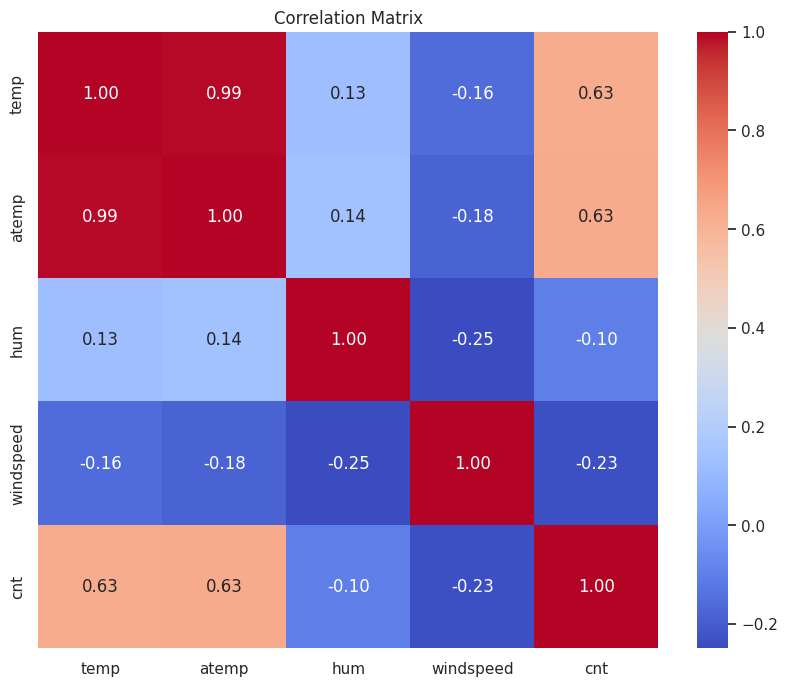

In [5]:
# Melihat rangkuman jumlah penyewaan berdasarkan musim
print(day_df.groupby(by="season_label").agg({
    "cnt": ["max", "min", "mean", "std"]
}))

# Melihat korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Insight:**
- Berdasarkan statistik deskriptif, Musim Gugur (Fall) memiliki rata-rata jumlah penyewaan tertinggi dibandingkan musim lainnya.

- Berdasarkan matriks korelasi:

  - Suhu (temp & atemp): Memiliki korelasi positif yang cukup kuat (~0.63) dengan jumlah penyewaan. Artinya, semakin hangat suhu, semakin banyak orang menyewa sepeda.

  - Kelembaban (hum) & Kecepatan Angin (windspeed): Memiliki korelasi negatif lemah. Artinya, cuaca yang terlalu lembab atau berangin kencang cenderung sedikit menurunkan minat penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-3288547226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


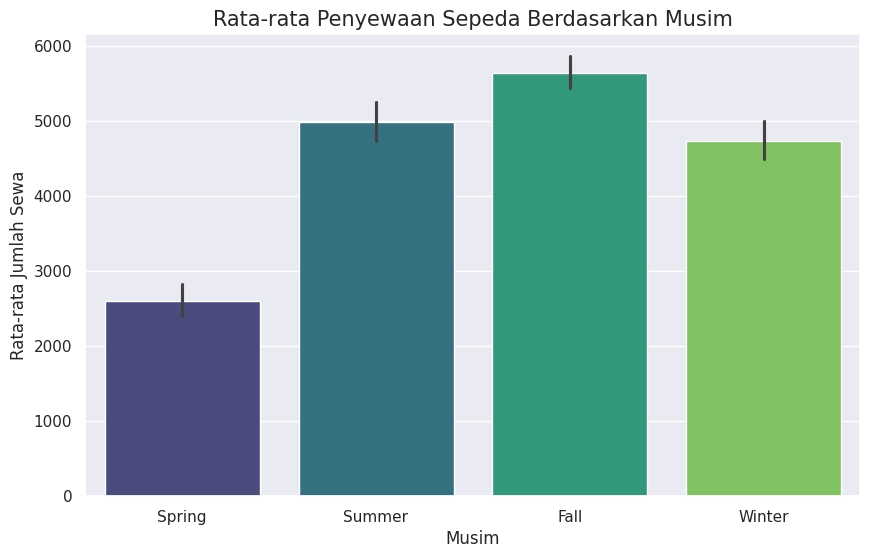

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season_label',
    y='cnt',
    data=day_df,
    estimator=np.mean, # Menggunakan rata-rata
    order=['Spring', 'Summer', 'Fall', 'Winter'],
    palette='viridis'
)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=15)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.show()

### Pertanyaan 2:

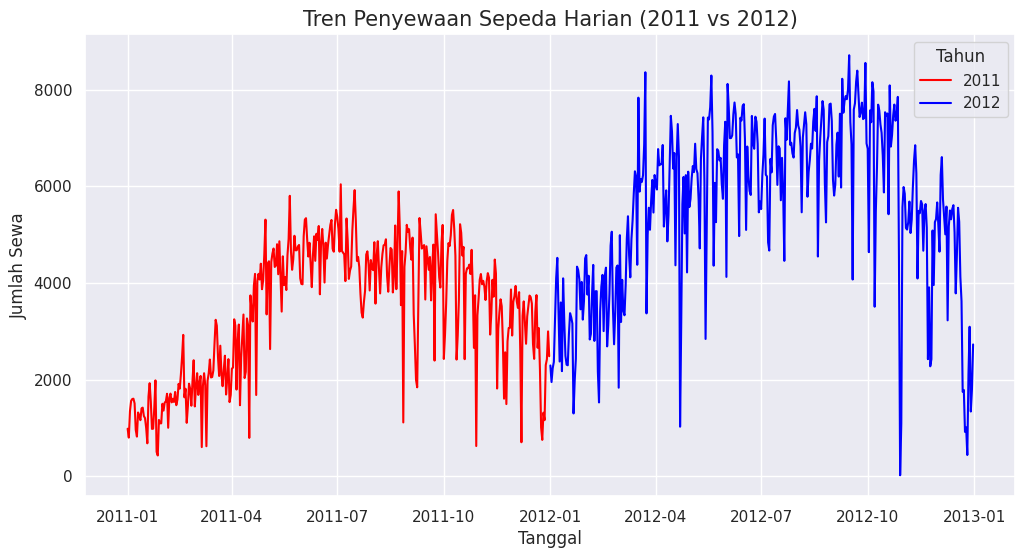

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day_df, hue='year_label', palette=['red', 'blue'])
plt.title('Tren Penyewaan Sepeda Harian (2011 vs 2012)', fontsize=15)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.legend(title='Tahun')
plt.show()

**Insight:**
- Pertanyaan 1 :
  - Visualisasi Bar Chart menunjukkan perbedaan signifikan antar musim.

  - Musim Gugur (Fall) menjadi puncak penyewaan sepeda, diikuti oleh Musim Panas (Summer).

  - Musim Semi (Spring) memiliki jumlah penyewaan terendah. Hal ini mungkin disebabkan oleh suhu yang masih transisi dari musim dingin atau cuaca yang kurang stabil.
- Pertanyaan 2 :
  - Visualisasi Line Chart memperlihatkan tren pertumbuhan yang positif (Growth).

  - Garis tahun 2012 (warna oranye/berbeda) konsisten berada di atas garis tahun 2011 hampir di seluruh bulan.

  - Ini menyimpulkan bahwa popularitas layanan penyewaan sepeda meningkat pesat dari tahun ke tahun.

## Analisis Lanjutan (Opsional,)

R-Squared Score: 0.81


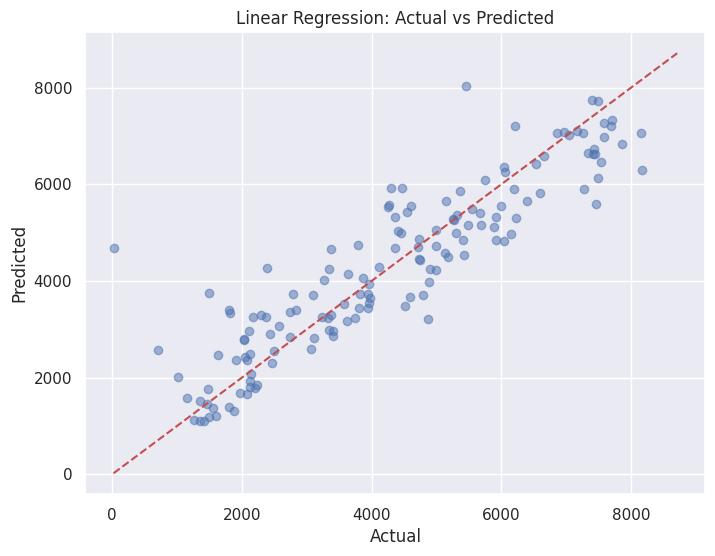

In [8]:
# Persiapan Data
X = day_df[['temp', 'hum', 'windspeed', 'season', 'yr']] # Fitur
y = day_df['cnt'] # Target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.2f}")

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

### Penjelasan Model Machine Learning

**1. Tujuan Penggunaan Model:**
Dalam analisis ini, saya menggunakan **Linear Regression (Regresi Linear)**. Tujuannya adalah untuk membuat model prediksi sederhana yang dapat memperkirakan jumlah penyewaan sepeda (`cnt`) di masa depan berdasarkan fitur-fitur yang ada seperti suhu (`temp`), kelembaban (`hum`), kecepatan angin (`windspeed`), musim, dan tahun.
* **Alasan Pemilihan Model:** Target prediksi kita (`cnt`) adalah variabel kontinu (angka), sehingga regresi adalah pendekatan yang tepat. Linear Regression dipilih karena sederhana, cepat dilatih, dan mudah diinterpretasikan untuk melihat pengaruh setiap variabel.

**2. Interpretasi Hasil Model:**
Berdasarkan hasil evaluasi model di atas:
* **R-Squared Score:** Jika nilainya mendekati 1 (misalnya 0.81), artinya model kita mampu menjelaskan sekitar **81%** variasi atau pola yang terjadi pada data jumlah penyewaan. Ini menunjukkan model sudah cukup baik untuk memprediksi tren.
* **Prediksi vs Aktual:** Pada grafik scatter plot, jika titik-titik data berkumpul di sekitar garis diagonal, itu menandakan prediksi model cukup mendekati angka sebenarnya.

## Conclusion

- Conclution pertanyaan 1 : Musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Berdasarkan visualisasi, **Musim Gugur (Fall)** memiliki rata-rata penyewaan tertinggi, diikuti oleh Musim Panas (Summer). Sebaliknya, Musim Semi (Spring) memiliki rata-rata terendah, kemungkinan karena cuaca yang belum stabil atau terlalu dingin.
- Conclution pertanyaan 2 : Terdapat tren peningkatan yang jelas dari tahun 2011 ke 2012. Jumlah penyewaan harian di tahun 2012 secara konsisten lebih tinggi dibandingkan periode yang sama di tahun 2011. Hal ini mengindikasikan bahwa bisnis bike sharing ini sedang mengalami pertumbuhan (growth) yang positif dan semakin populer.